In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,job_state,age,python,R,tableau,excel,aws,sql,azure,spark
0,Data Scientist,$66K - $107K (Glassdoor est.),"HPOne, named CT Magazine's 2018 Great Places t...",3.2,HPOne\n3.2,"Trumbull, CT",501 to 1000 Employees,2006,Company - Private,Insurance Carriers,...,CT,14,1,1,1,1,0,0,0,0
1,Data Scientist,$100K - $160K (Glassdoor est.),Are you passionate about providing real impact...,4.6,Johns Hopkins Applied Physics Laboratory (APL)...,"Laurel, MD",5001 to 10000 Employees,1942,Nonprofit Organization,Aerospace & Defense,...,MD,78,1,0,0,1,0,0,0,0
2,"Scientist, Product Development",$50K - $93K (Glassdoor est.),Summary:\nMetagenics is a global lifestyle med...,3.1,Metagenics\n3.1,"Gig Harbor, WA",201 to 500 Employees,1983,Company - Private,Health Care Services & Hospitals,...,WA,37,0,0,0,1,0,0,0,0
3,"Scientist III, Quality Control",$35K - $64K (Glassdoor est.),The Scientist 3 - QC is responsible to perform...,3.4,Amneal Pharmaceuticals\n3.4,"Brookhaven, NY",5001 to 10000 Employees,2002,Company - Public,Biotech & Pharmaceuticals,...,NY,18,0,0,0,0,0,0,0,0
4,Healthcare Analytics Consultant,$48K - $74K (Glassdoor est.),"The Berkeley Research Group, LLC (BRG) Healthc...",3.0,"Berkeley Research Group, LLC\n3.0","Tampa, FL",1001 to 5000 Employees,2010,Company - Private,Consulting,...,FL,10,0,0,0,1,0,1,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'R',
       'tableau', 'excel', 'aws', 'sql', 'azure', 'spark'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.job_simp.value_counts()

data scientist    397
analyst           107
na                104
data engineer      43
mle                 8
manager             3
director            1
Name: job_simp, dtype: int64

In [9]:
## Job title and seniority

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        564
senior     98
jr          1
Name: seniority, dtype: int64

In [10]:
df.job_state.value_counts()

 CA    121
 VA     76
 NY     64
 TX     55
 MA     49
 MD     36
 IL     30
 PA     23
 NC     23
 MO     19
 DC     19
 WI     17
 NJ     16
 WA     15
 GA     14
 UT     12
 NE     10
 FL      9
 KS      6
 AL      6
 MN      5
 IN      5
 OH      4
 ME      4
 MI      4
 CO      4
 CT      3
 KY      2
 SC      2
 OK      2
 NM      2
 AZ      2
 TN      1
 RI      1
 IA      1
 ID      1
Name: job_state, dtype: int64

In [11]:
#  Job description length 

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3572
1      2923
2      8073
3      5338
4      5609
       ... 
658    2028
659    2424
660    2424
661    5673
662    5673
Name: desc_len, Length: 663, dtype: int64

In [12]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [13]:
##displaying hourly and their respective annual salaries

df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
71,1,42,58
72,1,42,58
87,1,36,50
91,1,36,50
92,1,36,50
97,1,36,66
98,1,36,66
260,1,34,56
261,1,34,56
335,1,54,90


In [14]:
df['company_txt']

0                                               HPOne\n
1      Johns Hopkins Applied Physics Laboratory (APL)\n
2                                          Metagenics\n
3                              Amneal Pharmaceuticals\n
4                        Berkeley Research Group, LLC\n
                             ...                       
658                                  Zel Technologies\n
659                                Hospice Source LLC\n
660                                Hospice Source LLC\n
661                                           ManTech\n
662                                           ManTech\n
Name: company_txt, Length: 663, dtype: object

In [15]:
# removing \n from company_txt
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [16]:
df.describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,age,python,R,tableau,excel,aws,sql,azure,spark,desc_len
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,3.698944,1137.675716,0.021116,71.892911,120.309201,95.555807,25.337858,0.619910,0.141780,0.212670,0.481146,0.218703,0.603318,0.093514,0.168929,4003.511312
std,0.578582,977.897802,0.143880,25.256431,36.838703,31.710119,39.820828,0.485775,0.349088,0.409505,0.500022,0.413679,0.489578,0.291372,0.374972,1568.389410
min,1.800000,-1.000000,0.000000,11.000000,40.000000,21.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,3.400000,-1.000000,0.000000,55.500000,94.000000,73.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2912.000000
50%,3.700000,1929.000000,0.000000,70.000000,119.000000,94.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3921.000000
75%,4.000000,1996.000000,0.000000,87.000000,143.000000,114.500000,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4830.000000
max,5.000000,2020.000000,1.000000,162.000000,258.000000,210.000000,236.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12240.000000


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'R',
       'tableau', 'excel', 'aws', 'sql', 'azure', 'spark', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

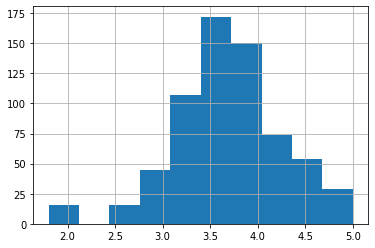

In [18]:
df.Rating.hist()

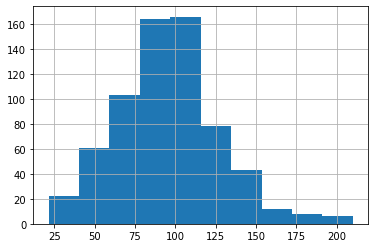

In [19]:
df.avg_salary.hist()

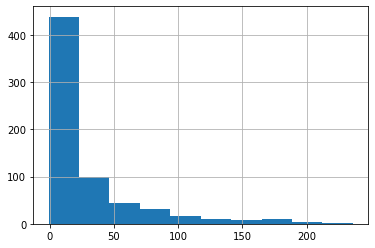

In [20]:
df.age.hist()

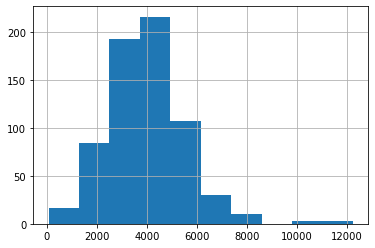

In [21]:
df.desc_len.hist()

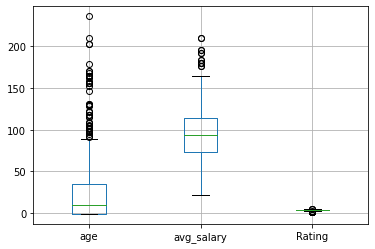

In [22]:
df.boxplot(column = ['age','avg_salary','Rating'])

In [23]:
# finding correlation
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.029714,0.050920,0.106466
avg_salary,0.029714,1.000000,0.119486,0.070278
Rating,0.050920,0.119486,1.000000,0.008588
desc_len,0.106466,0.070278,0.008588,1.000000


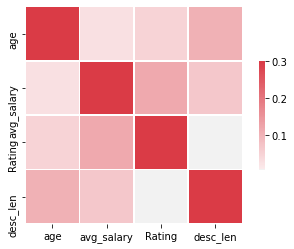

In [24]:
# heat map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'R',
       'tableau', 'excel', 'aws', 'sql', 'azure', 'spark', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [26]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python', 'R',
       'spark', 'aws', 'excel', 'job_simp', 'seniority','sql', 'tableau']]

graph for Location: total = 162


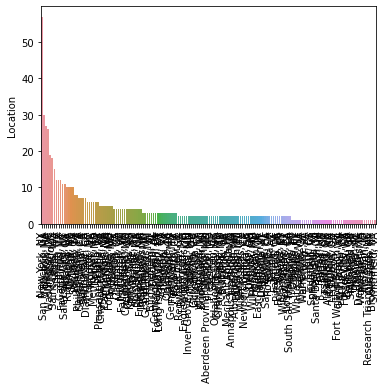

graph for Size: total = 9


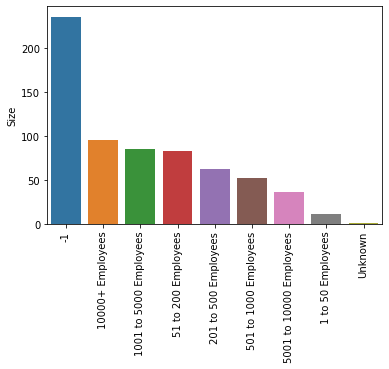

graph for Type of ownership: total = 11


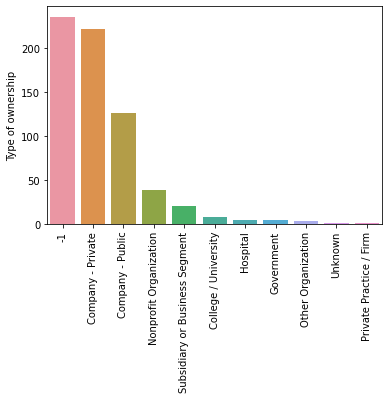

graph for Industry: total = 60


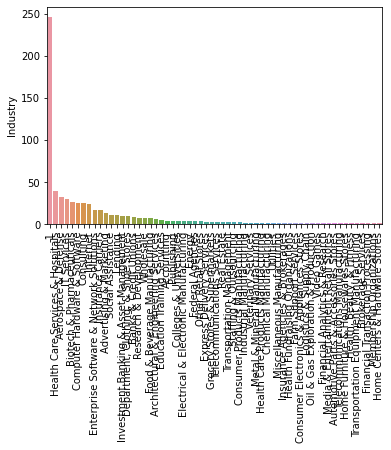

graph for Sector: total = 21


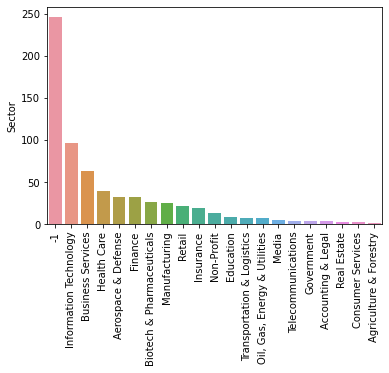

graph for Revenue: total = 14


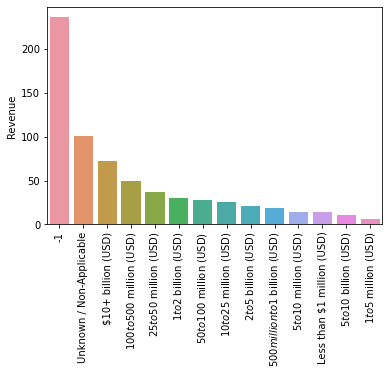

graph for company_txt: total = 278


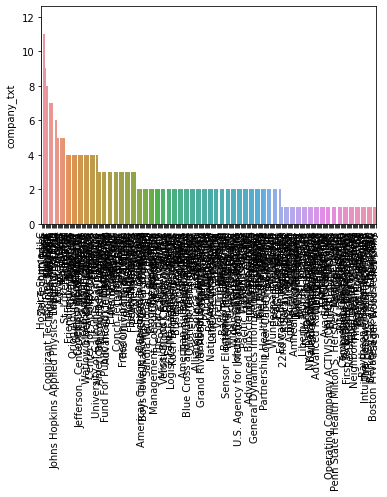

graph for job_state: total = 36


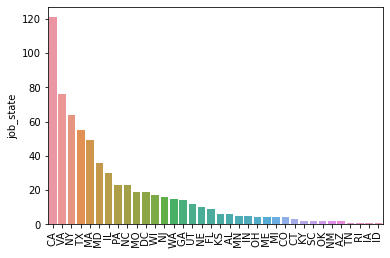

graph for python: total = 2


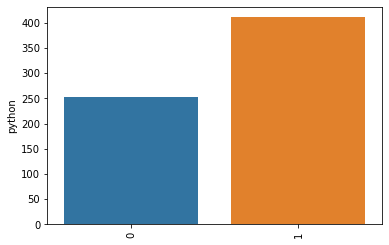

graph for R: total = 2


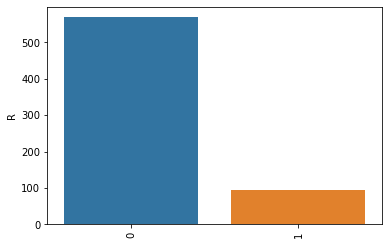

graph for spark: total = 2


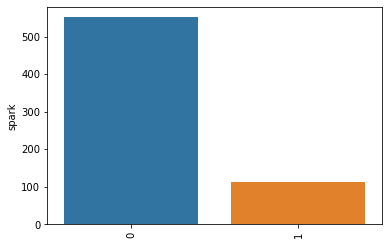

graph for aws: total = 2


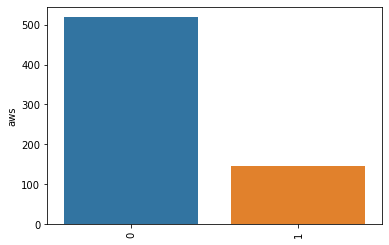

graph for excel: total = 2


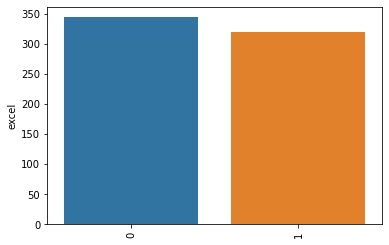

graph for job_simp: total = 7


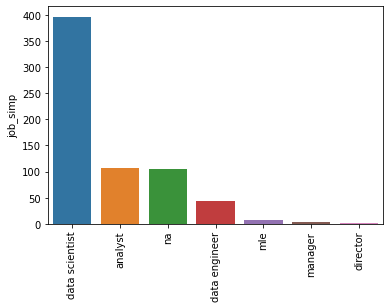

graph for seniority: total = 3


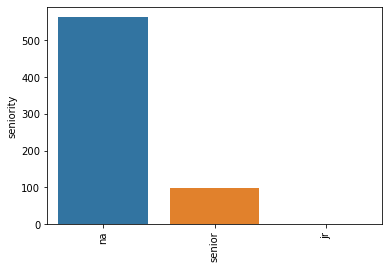

graph for sql: total = 2


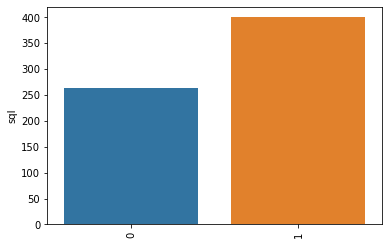

graph for tableau: total = 2


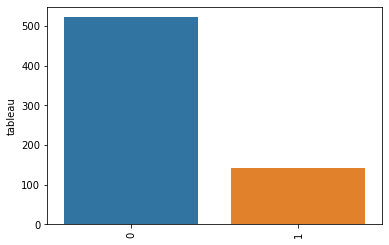

In [27]:
for i in df_cat.columns:
    plt.show()
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


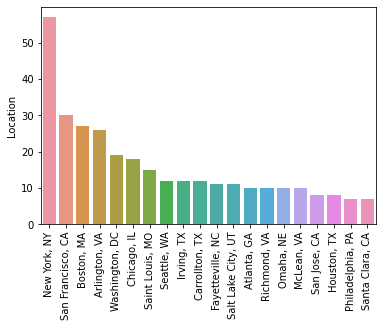

graph for company_txt: total = 20


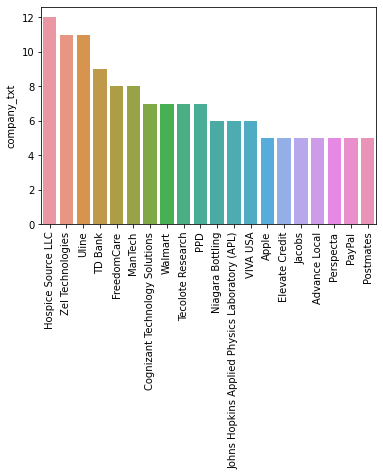

graph for Industry: total = 20


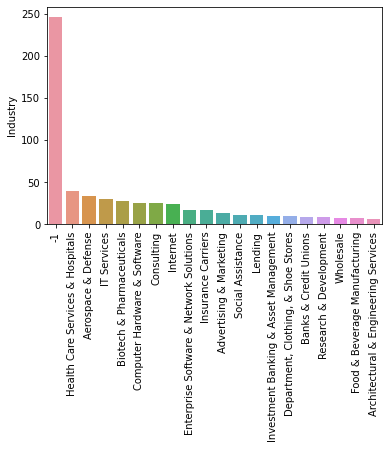

In [28]:
for i in df_cat[['Location','company_txt','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,64.205607
data engineer,98.058140
data scientist,109.627204
director,158.000000
manager,56.833333
mle,131.062500
na,70.846154


In [30]:
#avg salary wrt jab title and seniority level
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          61.813830
               senior      81.500000
data engineer  na          88.810345
               senior     117.214286
data scientist jr          60.000000
               na         106.700867
               senior     130.870000
director       na         158.000000
manager        na          56.833333
mle            na         105.375000
               senior     156.750000
na             na          65.885057
               senior      96.235294

In [31]:
#avg salary wrt job title and state
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
 WI       na               63.500000
          data engineer    86.500000
          analyst          70.727273
 WA       na               98.166667
          data scientist  117.750000
...                              ...
 CA       analyst          94.500000
          na               98.500000
          data engineer    97.666667
 AZ       data scientist  116.000000
 AL       analyst          60.416667

[90 rows x 1 columns]

In [32]:
# no.of certain job titles and seniority level wrt state and also to find all rows
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
 WI       na                       4
          data engineer            2
          analyst                 11
 WA       na                       3
          data scientist           2
          data engineer            2
          analyst                  8
 VA       data scientist          44
          analyst                 21
          data engineer            5
          manager                  1
          mle                      2
          na                       3
 UT       data scientist           8
          data engineer            2
          analyst                  2
 TX       na                      19
          data scientist          25
          data engineer            6
          analyst                  5
 TN       data scientist           1
 SC       na                       2
 RI       analyst                  1
 PA       na                       6
          data scientist          12
          data engineer            1
          analyst                  4
 OK       analyst                  2
 OH       data scientist           3
          analyst                  1
 NY       data engineer            3
          analyst                  9
          data scientist          49
          na                       3
 NM       na                       2
 NJ       mle                      1
          data scientist           6
          data engineer            2
          analyst                  7
 NE       na                       6
          analyst                  4
 NC       na                       3
          analyst                  2
          data scientist          18
 MO       na                       2
          data engineer            4
          data scientist          13
 MN       na                       3
          data scientist           2
 MI       na                       2
          data scientist           1
          analyst                  1
 ME       data scientist           4
 MD       data scientist          26
          na                      10
 MA       data scientist          36
          analyst                  6
          data engineer            2
          na                       3
          manager                  2
 KY       data scientist           2
 KS       na                       4
          analyst                  2
 IN       analyst                  3
          data scientist           2
 IL       data scientist          18
          analyst                  2
          na                      10
 ID       data scientist           1
 IA       data engineer            1
 GA       data scientist           5
          data engineer            5
          analyst                  4
 FL       analyst                  1
          na                       1
          data scientist           7
 DC       data scientist          12
          director                 1
          na                       6
 CT       na                       2
          data scientist           1
 CO       data engineer            2
          analyst                  2
 CA       mle                      5
          data scientist          97
          analyst                  3
          na                      10
          data engineer            6
 AZ       data scientist           2
 AL       analyst                  6

In [33]:
#avg salary of data scientists wrt state and in descending order of avg salary
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
CA,129.603093
GA,118.100000
WA,117.750000
AZ,116.000000
KY,114.500000
NY,113.897959
MA,111.013889
TN,109.000000
NJ,106.750000


In [34]:
#avg salary wrt all given pivots

df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python', 'R', 'spark', 'aws', 'excel','tableau','sql', 'Type of ownership','avg_salary']]
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
4.5     128.566667
5.0     123.166667
2.0     119.333333
4.9     117.500000
4.2     113.462963
3.3     113.047619
4.8     113.000000
4.4     106.750000
2.7     106.750000
4.7     104.038462
4.1     101.394737
2.9     100.200000
3.8      97.954545
3.5      97.442308
3.4      97.400000
3.1      93.176471
4.3      91.375000
4.0      90.701923
4.6      90.065217
3.7      88.322917
3.6      88.159722
3.9      87.166667
3.2      85.666667
1.8      82.500000
2.8      82.388889
3.0      82.272727
2.6      78.000000
2.1      78.000000
2.5      67.500000
Industry
                                          avg_salary
Industry                                            
Brokerage Services                        146.000000
Transportation Equipment Manufacturing    140.000000
Internet                                  127.520833
Oil & Gas Exploration & Production        124.500000
Lending                                   122.590909
Home Centers & Hardware 

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [35]:
#no.of jobs wrt knowing python and revenue of the company
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),9.0,21.0
$1 to $5 million (USD),NaN,6.0
$10 to $25 million (USD),15.0,10.0
$10+ billion (USD),15.0,57.0
$100 to $500 million (USD),16.0,33.0
$2 to $5 billion (USD),12.0,9.0
$25 to $50 million (USD),25.0,12.0
$5 to $10 billion (USD),3.0,8.0
$5 to $10 million (USD),3.0,11.0


In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RITHWIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RITHWIK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

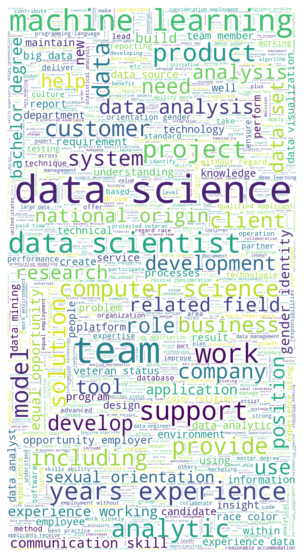

In [38]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
df.to_csv('eda_ds.csv')